In [165]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics

import phik #https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ
–ì–¥–µ –¥–µ—à–µ–≤–ª–µ –∂–∏—Ç—å? –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ü–µ–Ω –≤ Airbnb - —É—á–∏–º—Å—è –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏

–¶–µ–ª—å:
–í —ç—Ç–æ–º –ø—Ä–æ–µ–∫—Ç–µ –≤—ã –ø–æ—Ç—Ä–µ–Ω–∏—Ä—É–µ—Ç–µ—Å—å —Å—Ç—Ä–æ–∏—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ –±–µ–∑, –∞ —Ç–∞–∫–∂–µ –ø—Ä–∏–¥—É–º—ã–≤–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

## –ß–∞—Å—Ç—å 1. EDA

### 1.1 –°–∫–∞—á–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ —Å Kaggle –ø–æ —Ü–µ–Ω–∞–º –Ω–∞ –∂–∏–ª—å—ë –≤ Airbnb –≤ –ù—å—é-–ô–æ—Ä–∫–µ:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [166]:
data = pd.read_csv('AB_NYC_2019.csv')

In [167]:
df = data.copy() #—Å–∫–æ–ø–∏—Ä—É—é data –≤ –ø–µ—Ä–µ–º–µ–Ω—É—é df, —á—Ç–æ–±—ã –Ω–µ –ø–æ–¥–≥—Ä—É–∂–∞—Ç—å data

In [168]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#### –í—ã–≤–æ–¥: –°–∫–∞—á–∞–ª –¥–∞–Ω–Ω—ã–µ —Å Kaggle –ø–æ —Ü–µ–Ω–∞–º –Ω–∞ –∂–∏–ª—å—ë –≤ Airbnb –≤ –ù—å—é-–ô–æ—Ä–∫–µ

###  1.2 –ü—Ä–æ–π–¥–∏—Ç–µ –ø–æ –æ—Å–Ω–æ–≤–Ω—ã–º —à–∞–≥–∞–º —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ - –±–∞–∑–æ–≤—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ (—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, pair plots), –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö. –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞ –Ω—É–∂–Ω–æ —É–±—Ä–∞—Ç—å: id, name, host_id, host_name, last_review.

#### 1.2.1 –±–∞–∑–æ–≤—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

In [169]:
df.shape

(48895, 16)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [171]:
# –∫–æ–ª–æ–Ω–∫–∏ –Ω–∞ —É–¥–∞–ª–µ–Ω–∏–µ –ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞ –Ω—É–∂–Ω–æ —É–±—Ä–∞—Ç—å: id, name, host_id, host_name, last_review
drop_list = ['id', 'name', 'host_id', 'host_name', 'last_review']

In [172]:
# –±–∞–∑–æ–≤—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [173]:
#–Ω–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∞–Ω–Ω—ã—Ö
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### –Ω–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ –≤ —Å—Ç–æ–ª–±—Ü–µ reviews_per_month - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ –º–µ—Å—è—Ü. last_review name host_name in drop_list

In [174]:
# –∑–∞–º–µ–Ω—é –Ω—É–ª—è–º–∏ –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [175]:
#–Ω–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### –Ω–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç

#### –≤—ã–¥–µ–ª–∏–º –∫–æ–ª–æ–Ω–∫–∏ –ø–æ —Ç–∏–ø–∞–º –¥–∞–Ω–Ω—ã—Ö

In [176]:
df.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

In [177]:
#—á–∏—Å–ª–æ–≤—ã–µ, –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ãe
columns = df.drop(columns = drop_list).select_dtypes(['int64', 'float64']).columns
print(columns)

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [178]:
#–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
categorical_columns = df.drop(columns = drop_list).select_dtypes(['object']).columns
print(categorical_columns)

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


####  1.2.2 –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ (—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, pair plots), –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

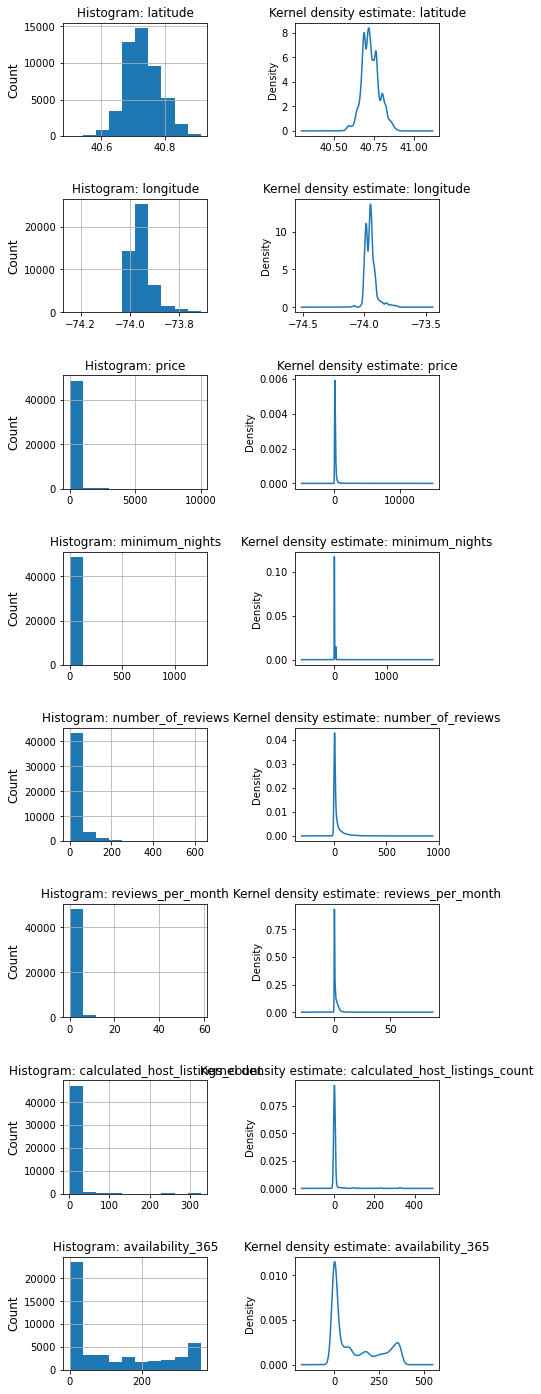

In [179]:
# –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö, –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
# –æ–∫—Ä—É–∂–µ–Ω–∏–µ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤, –¥–ª—è –∫–∞–∂–¥–æ–π –∫–æ–ª–æ–Ω–∫–∏ –¥–≤–∞ —Å—Ç–æ–ª–±—Ü–∞
fig, axs = plt.subplots(nrows=len(columns), ncols=2, figsize=(7,20))

for index, column in enumerate(columns):
    # –í –ø–µ—Ä–≤–æ–º —Å—Ç–æ–ª–±—Ü–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
    df[column].hist(ax=axs[index, 0])
    axs[index, 0].set_title(f'Histogram: {column}', fontsize=12)
    axs[index, 0].set_ylabel('Count', fontsize=12)
        
    # –í–æ –≤—Ç–æ—Ä–æ–º —Å—Ç–æ–ª–±—Ü–µ –≥—Ä–∞—Ñ–∏–∫ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ —è–¥–µ—Ä–Ω–æ–π –æ—Ü–µ–Ω–∫–∏
    df[column].plot(kind='kde', ax=axs[index, 1])
    axs[index, 1].set_title(f'Kernel density estimate: {column}', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

<AxesSubplot:>

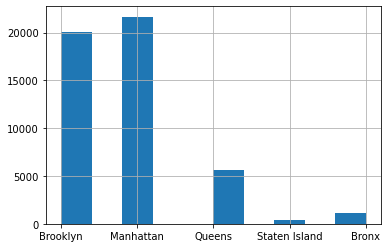

In [180]:
#–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ãe
df['neighbourhood_group'].hist()

<AxesSubplot:>

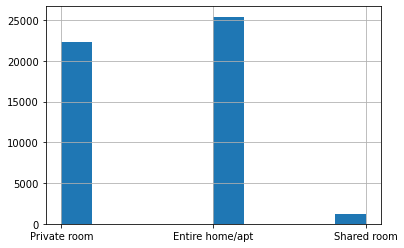

In [181]:
df['room_type'].hist()

<AxesSubplot:>

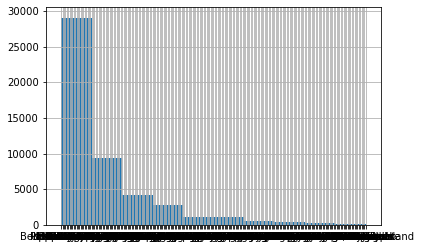

In [182]:
df['neighbourhood'].hist()

##### –ø–µ—Ä–µ–≤–µ–¥—É neighbourhood_group –∏ room_type –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ-–∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã, –∞ –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π neighbourhood –ø—Ä–∏–º–µ–Ω—é —á–∞—Å—Ç–æ—Ç–Ω–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ.

In [183]:
#neighbourhood_group –∏ room_type –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ-–∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group']), pd.get_dummies(df['room_type'])], axis=1)

In [184]:
#neighbourhood –ø—Ä–∏–º–µ–Ω—é —á–∞—Å—Ç–æ—Ç–Ω–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
df_neighbourhood_freq = pd.DataFrame(df['neighbourhood'].value_counts(normalize=True)).reset_index().rename(columns={'neighbourhood': 'neighbourhood_freq'})
df = df.merge(df_neighbourhood_freq, how = 'left', left_on='neighbourhood', right_on = 'index')
df.drop(columns='index', inplace=True)

In [185]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  ...  availability_365  Bronx Brooklyn  Manhattan  \
0     Private room    149  ...               365      0        1          0   
1  Entire home/apt    225  ...               355      0        0          1   
2     Private room    150  ...               365      0        0          1   
3  Entire home/apt     89  ...               194      0        1          0   
4  Entire home/apt     80  ...                 0      0        0          1   

   Queens  Staten Island  Entire home/apt  Private room  Shared room  \
0       0              0                0             1            0   
1       0              0                1             0            0   
2       0              0                0             1            0   
3       0              0                1             0            0   
4       0              0                1             0            0   

   neighbourhood_freq  
0            0.003579  
1            0.031598  
2            0.054361  
3            0.011699  
4            0.022845  

[5 rows x 25 columns]

In [186]:
# –ø–æ—Å–º–æ—Ç—Ä—é, –∫–∞–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã –µ—Å—Ç—å –∏ –∫–∞–∫–∏–µ –Ω–∞ —É–¥–∞–ª–µ–Ω–∏–µ, –ø—Ä–∏ –Ω–µ–æ–±–æ—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –¥–æ–ø–æ–ª–Ω—é —Å–ø–∏—Å–æ–∫ drop_list
print(f'df.columns: {df.columns}')
print(f'drop_list: {drop_list}')

df.columns: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
       'neighbourhood_freq'],
      dtype='object')
drop_list: ['id', 'name', 'host_id', 'host_name', 'last_review']


In [187]:
#–¥–æ–ø–æ–ª–Ω–µ–Ω–∏–µ drop_list
drop_list.extend(['neighbourhood_group', 'neighbourhood', 'room_type'])

In [188]:
drop_list

['id',
 'name',
 'host_id',
 'host_name',
 'last_review',
 'neighbourhood_group',
 'neighbourhood',
 'room_type']

In [189]:
df.drop(drop_list, axis=1, inplace=True)

In [190]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
       'neighbourhood_freq'],
      dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   Bronx                           48895 non-null  uint8  
 9   Brooklyn                        48895 non-null  uint8  
 10  Manhattan                       48895 non-null  uint8  
 11  Queens                          48895 non-null  uint8  
 12  Staten Island                   

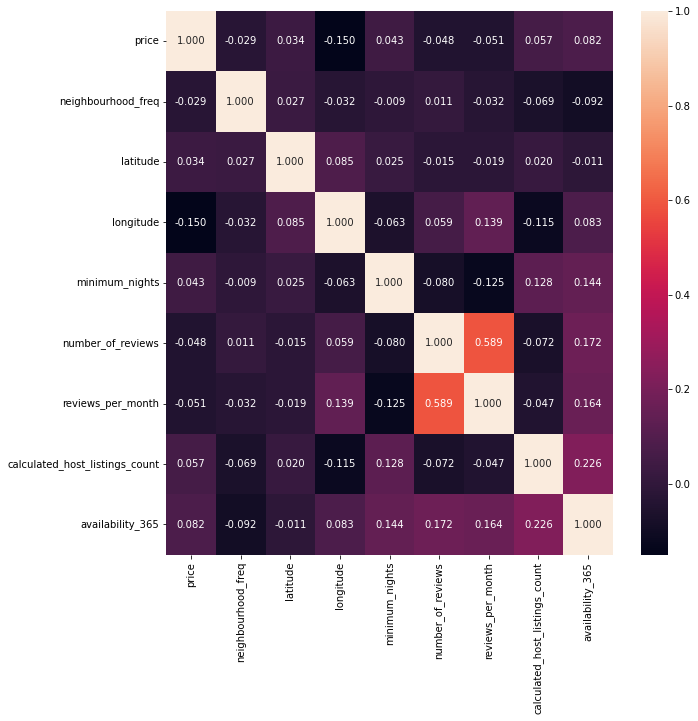

In [192]:
#–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
corr_list = ['price', 'neighbourhood_freq', 'latitude', 'longitude', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
corr = df[corr_list].corr()

# –û—Ç–æ–±—Ä–∞–∑–∏–º –µ–µ –Ω–∞ —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç–µ
plt.figure(figsize=(10,10));
sns.heatmap(corr, annot=True, fmt='.3f');

In [193]:
phik_overview = df[corr_list].phik_matrix(interval_cols=corr_list)

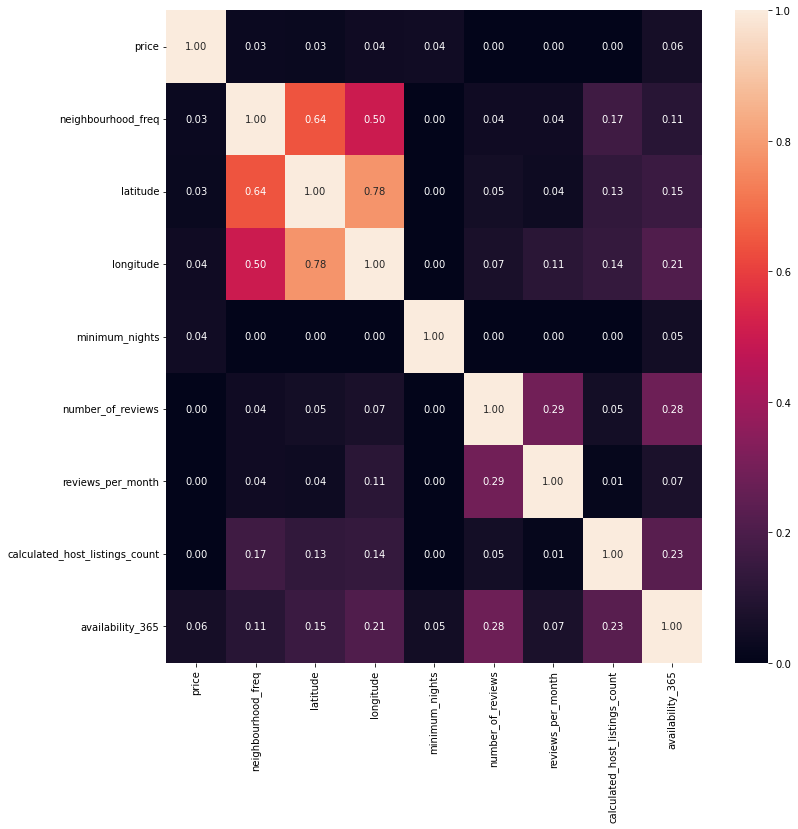

In [194]:
plt.figure(figsize=(12,12));
sns.heatmap(phik_overview, annot=True, fmt='.2f');

In [195]:
#–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –∑–∞–≤–∏—Å–∏–º—ã–º–∏ –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ —è–≤–ª—è—é—Ç—Å—è 
#number_of_reviews', 'reviews_per_month;  neighbourhood_freq –∏ ('latitude' or 'longitude')
#–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –ø–∞—Ä–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

<AxesSubplot:xlabel='reviews_per_month', ylabel='number_of_reviews'>

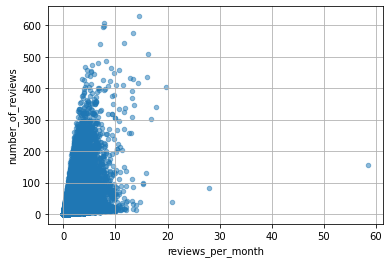

In [196]:
df[['reviews_per_month', 'number_of_reviews']].plot(kind = 'scatter', y='number_of_reviews', x='reviews_per_month', 
                                                    grid = True, alpha = 0.5)

<AxesSubplot:xlabel='latitude', ylabel='neighbourhood_freq'>

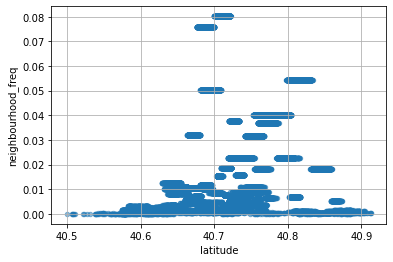

In [197]:
df[['neighbourhood_freq', 'latitude']].plot(kind = 'scatter', y='neighbourhood_freq', x='latitude', 
                                                    grid = True, alpha = 0.5)

<AxesSubplot:xlabel='longitude', ylabel='neighbourhood_freq'>

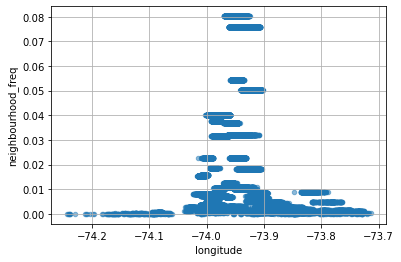

In [198]:
df[['neighbourhood_freq', 'longitude']].plot(kind = 'scatter', y='neighbourhood_freq', x='longitude', 
                                                    grid = True, alpha = 0.5)

## –ß–∞—Å—Ç–∏ 2,3. Preprocessing & Feature Engineering. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
### Preprocessing & Feature Engineering
–í–∞—à–∞ —Ü–µ–ª—å –ø–æ–ª—É—á–∏—Ç—å –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ (–º–æ–∂–Ω–æ –≤–∑—è—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ, R2, MAE, RMSE), —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–≤—à–∏—Å—å –Ω–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
–û–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ç–µ—Ö–Ω–∏–∫–∏:
—Ä–∞–±–æ—Ç–∞ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (–º–æ–∂–Ω–æ –Ω–∞—á–∞—Ç—å —Å dummy);
–∑–∞–º–µ–Ω–∞ –∞–Ω–æ–º–∞–ª–∏–π;
—Ä–∞–∑–ª–∏—á–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã —à–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (StandardScaler, RobustScaler, –∏.—Ç.–¥.);
–æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –≤–æ–∑–º–æ–∂–Ω–æ, —Å –Ω–µ–π —Ç–æ–∂–µ –º–æ–∂–Ω–æ –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å;
–ü–æ–ø—Ä–æ–±—É–π—Ç–µ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∏–º–µ—é—â–∏—Ö—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å–æ–∑–¥–∞—Ç—å –Ω–æ–≤—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥–ª–∏ –±—ã —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –ú–∞–Ω—Ö—ç—Ç—Ç–µ–Ω–∞ (—Å–∞–º–æ–≥–æ –¥–æ—Ä–æ–≥–æ–≥–æ —Ä–∞–π–æ–Ω–∞) –∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ —à–∏—Ä–æ—Ç—ã –∏ –¥–æ–ª–≥–æ—Ç—ã, –∞ —Ç–∞–∫–∂–µ –µ–≤–∫–ª–∏–¥–æ–≤–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è —Å–æ–∑–¥–∞—Ç—å –Ω–æ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é - —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç –∫–≤–∞—Ä—Ç–∏—Ä—ã –¥–æ —ç—Ç–æ–≥–æ —Ä–∞–π–æ–Ω–∞. –í–æ–∑–º–æ–∂–Ω–æ, —Ç–∞–∫–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –ª—É—á—à–µ, —á–µ–º –ø—Ä–æ—Å—Ç–æ —à–∏—Ä–æ—Ç–∞ –∏ –¥–æ–ª–≥–æ—Ç–∞.
### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
–û—Ç–ª–æ–∂–∏—Ç–µ 30% –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.
–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –º–æ–¥–µ–ª–∏ –ø—Ä–æ—Å—Ç–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, RidgeCV, LassoCV –∏ ElasticNetCV.
–ò–∑–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –∫–∞–∂–¥–æ–π –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
–°–¥–µ–ª–∞–π—Ç–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –≤—ã–≤–æ–¥—ã :)

In [199]:
#–∑–∞—Ñ–∏–∫—Å–∏—Ä—É—é random_state
random_state=13

In [200]:
# –°–æ—Ö—Ä–∞–Ω—é –≤  ùëã –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∞ –≤  ùë¶‚àí—Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.
X = df.drop('price', axis=1)
y = df['price']

X.shape, y.shape

((48895, 16), (48895,))

In [201]:
# –†–∞–∑–æ–±—å—é –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [202]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34226, 16), (14669, 16), (34226,), (14669,))

In [203]:
# –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –±—É–¥—É —Å–æ–±–∏—Ä–∞—Ç—å –≤ –¥–∞—Ç–∞-—Ñ—Ä–µ–π–º df_metrics. –°–æ–∑–¥–∞–º —Ñ—É–Ω–∫—Ü–∏—é
def get_df_metrics():
    df_metrics = pd.DataFrame({"error_name":["MAE", "RMSE", "R2"]})
    df_metrics.set_index("error_name")
    return df_metrics

In [204]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
def regression(X_train, X_test, y_train, y_test, regressor, regressor_name, df_metrics, plot_graphics=True):
    print('–†–µ–≥—Ä–µ—Å—Å–æ—Ä:', regressor_name)
    
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    if (hasattr(regressor, 'alpha_')):
        print('–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: {:.5f}'.format(regressor.alpha_))

    df_metrics[regressor_name] = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred)       
    ]

    if (plot_graphics):
        featureImportance = pd.DataFrame({"feature": X_train.columns[regressor.coef_!=0], 
                                          "importance": regressor.coef_[regressor.coef_!=0]})

        featureImportance.set_index('feature', inplace=True)
        featureImportance.sort_values(["importance"], ascending=False, inplace=True)

        featureImportance["importance"].plot(kind='bar', figsize=(10, 5));    
        plt.title("Feature Importance - " + regressor_name)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.show()

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LinearRegression


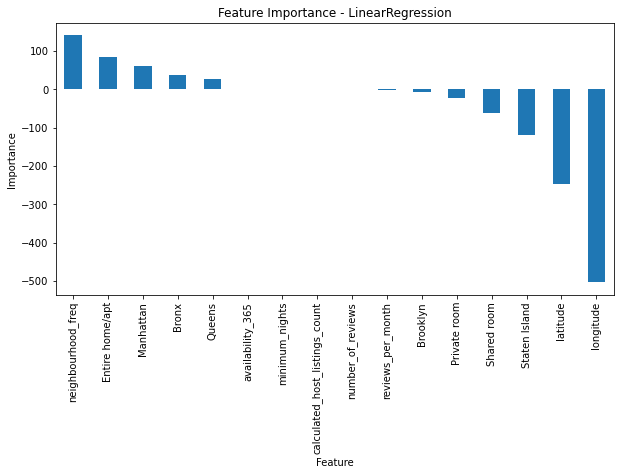

error_name  LinearRegression
0        MAE         73.186321
1       RMSE        227.860225
2         R2          0.091477

In [205]:
# –ü–æ—Å—Ç—Ä–æ—é –ø—Ä–æ—Å—Ç—É—é –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
df_metrics = get_df_metrics()

regression(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression', df_metrics)

df_metrics

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: RidgeCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 1.00000


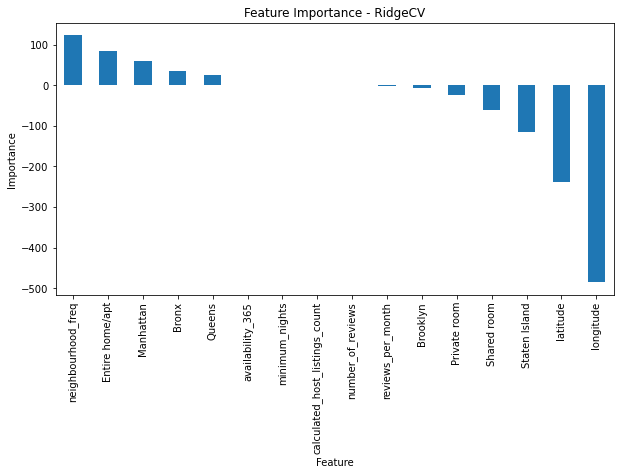

error_name  LinearRegression     RidgeCV
0        MAE         73.186321   73.159855
1       RMSE        227.860225  227.864648
2         R2          0.091477    0.091441

In [206]:
# –ü–æ—Å—Ç—Ä–æ—é –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ RidgeCV
regression(X_train, X_test, y_train, y_test, RidgeCV(cv=5), 'RidgeCV', df_metrics)

df_metrics

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LassoCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 2.74310


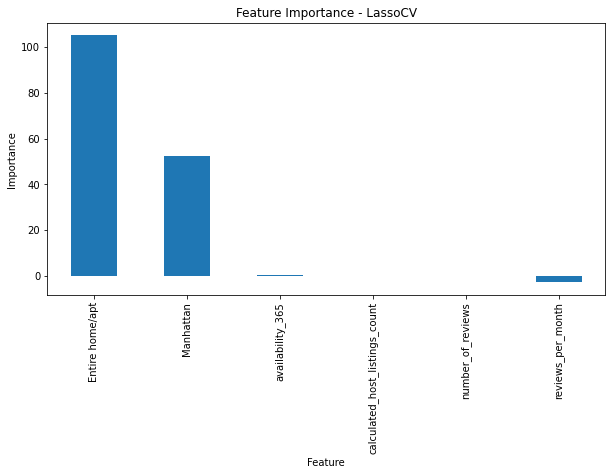

error_name  LinearRegression     RidgeCV     LassoCV
0        MAE         73.186321   73.159855   73.064345
1       RMSE        227.860225  227.864648  228.711975
2         R2          0.091477    0.091441    0.084672

In [207]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ LassoCV
regression(X_train, X_test, y_train, y_test, LassoCV(), 'LassoCV', df_metrics)

df_metrics

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: ElasticNetCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 5.48621


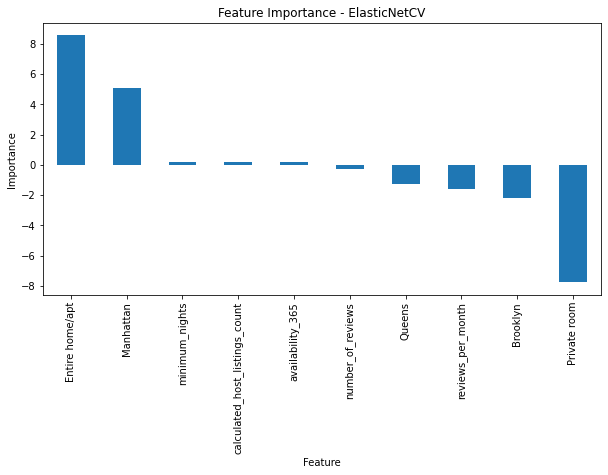

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.159855   73.064345     86.089001
1       RMSE        227.860225  227.864648  228.711975    235.576292
2         R2          0.091477    0.091441    0.084672      0.028904

In [208]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ ElasticNetCV
regression(X_train, X_test, y_train, y_test, ElasticNetCV(cv=5), 'ElasticNetCV', df_metrics)

df_metrics

In [209]:
# –≤—Å–µ —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä—ã –∏ –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏
def all_regressions(X_train, X_test, y_train, y_test):
    df_metrics = get_df_metrics()
    
    regression(X_train, X_test, y_train, y_test, LinearRegression(), 'LinearRegression', df_metrics, False)
    regression(X_train, X_test, y_train, y_test, RidgeCV(cv=5), 'RidgeCV', df_metrics, False)
    regression(X_train, X_test, y_train, y_test, LassoCV(cv=5), 'LassoCV', df_metrics, False)
    regression(X_train, X_test, y_train, y_test, ElasticNetCV(cv=5), 'ElasticNetCV', df_metrics, False)
    
    return df_metrics

In [210]:
df_metrics = all_regressions(X_train, X_test, y_train, y_test)
df_metrics_base = df_metrics.copy()
df_metrics_base

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LinearRegression
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: RidgeCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 1.00000
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LassoCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 2.74310
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: ElasticNetCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 5.48621


error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.159855   73.064345     86.089001
1       RMSE        227.860225  227.864648  228.711975    235.576292
2         R2          0.091477    0.091441    0.084672      0.028904

##### –±–∞–∑–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π df_metrics_base. –í —Å—Ä–µ–¥–Ω–µ–º RidgeCV –ø–æ–∫–∞–∑–∞–ª–∞ –ª—É—á—à–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞

In [211]:
def regressions_with_scaler(data, scaler, to_scale):
    X = data.drop('price', axis=1)
    y = data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[to_scale] = scaler.fit_transform(X_train[to_scale])
    X_test_scaled[to_scale] = scaler.transform(X_test[to_scale])

    return all_regressions(X_train_scaled, X_test_scaled, y_train, y_test)

In [212]:
scaler_list = ['neighbourhood_freq', 'latitude', 'longitude', 'minimum_nights', 
               'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']   

In [213]:
#–ø—Ä–æ—à–∫–∞–ª–∏—Ä—É—é –¥–∞–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é StandardScaler   
df_metrics = regressions_with_scaler(df, StandardScaler(), scaler_list)
df_metrics_StandardScaler = df_metrics.copy()
df_metrics_StandardScaler

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LinearRegression
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: RidgeCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 10.00000
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LassoCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.03675
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: ElasticNetCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.07350


error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.236457   73.164194   73.142410     72.810911
1       RMSE        227.865581  227.862977  227.863207    228.170576
2         R2          0.091434    0.091455    0.091453      0.089000

In [214]:
# —Å—Ä–∞–≤–Ω–∏–º —Å df_metrics_base
df_metrics_base

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.159855   73.064345     86.089001
1       RMSE        227.860225  227.864648  228.711975    235.576292
2         R2          0.091477    0.091441    0.084672      0.028904

##### LassoCV, ElasticNetCV —Å—Ç–∞–ª–æ –ª—É—á—à–µ, –æ—Å—Ç–∞–ª—å–Ω—ã–µ —É–ª—É—á—à–∏–ª–∏—Å—å, –Ω–æ –Ω–µ –º–Ω–æ–≥–æ

In [215]:
#–ø—Ä–æ—à–∫–∞–ª–∏—Ä—É—é –¥–∞–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é RobustScaler
df_metrics = regressions_with_scaler(df, RobustScaler(), scaler_list)
df_metrics_RobustScaler = df_metrics.copy()
df_metrics_RobustScaler

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LinearRegression
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: RidgeCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 10.00000
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LassoCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.45660
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: ElasticNetCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.91320


error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.161986   72.975800     75.264394
1       RMSE        227.860225  227.862721  228.044828    230.375945
2         R2          0.091477    0.091457    0.090004      0.071305

In [216]:
# —Å—Ä–∞–≤–Ω–∏–º —Å df_metrics_base
df_metrics_base

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.159855   73.064345     86.089001
1       RMSE        227.860225  227.864648  228.711975    235.576292
2         R2          0.091477    0.091441    0.084672      0.028904

##### df_metrics_base: LassoCV, ElasticNetCV —Å—Ç–∞–ª–æ –ª—É—á—à–µ, –æ—Å—Ç–∞–ª—å–Ω—ã–µ —É–ª—É—á—à–∏–ª–∏—Å—å, –Ω–æ –Ω–µ –º–Ω–æ–≥–æ

In [217]:
# —Å—Ä–∞–≤–Ω–∏–º —Å df_metrics_StandardScaler
df_metrics_StandardScaler

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.236457   73.164194   73.142410     72.810911
1       RMSE        227.865581  227.862977  227.863207    228.170576
2         R2          0.091434    0.091455    0.091453      0.089000

##### df_metrics_StandardScaler –ª—É—á—à–µ —á–µ–º df_metrics_RobustScaler

### –Ω–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
1. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –ú–∞–Ω—Ö—ç—Ç—Ç–µ–Ω–∞
2. —Å–æ–∑–¥–∞–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–∏—Å—Ç—Ä–∏–∫—Ç –∏ –µ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ

In [218]:
df.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  Bronx  \
0               0.21                               6               365      0   
1               0.38                               2               355      0   
2               0.00                               1               365      0   
3               4.64                               1               194      0   
4               0.10                               1                 0      0   

   Brooklyn  Manhattan  Queens  Staten Island  Entire home/apt  Private room  \
0         1          0       0              0                0             1   
1         0          1       0              0                1             0   
2         0          1       0              0                0             1   
3         1          0       0              0                1             0   
4         0          1       0              0                1             0   

   Shared room  neighbourhood_freq  
0            0            0.003579  
1            0            0.031598  
2            0            0.054361  
3            0            0.011699  
4            0            0.022845

In [219]:
# –Ω–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –ú–∞–Ω—Ö—ç—Ç—Ç–µ–Ω–∞ manhattan_coord = (40.758896, -73.985130)
# —Å–æ–∑–¥–∞—é —Å—Ç–æ–ª–±—Ü—ã df['lat0'] = 40.758896 df['lon0'] = -73.985130,  df['distance'] = sqrt((lat0 - latitude)^2 + (lon0 - longitude)^2)
# latitude, longitude, df['lat0'], df['lon0'] - drop
df['lat0'] = 40.758896
df['lon0'] = -73.985130
df['distance'] = ((df['lat0'] - df['latitude'])**2 + (df['lon0'] - df['longitude'])**2)**0.5
df.drop(columns = ['latitude', 'longitude', 'lat0', 'lon0'], inplace=True)
df.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  Bronx  Brooklyn  \
0                               6               365      0         1   
1                               2               355      0         0   
2                               1               365      0         0   
3                               1               194      0         1   
4                               1                 0      0         0   

   Manhattan  Queens  Staten Island  Entire home/apt  Private room  \
0          0       0              0                0             1   
1          1       0              0                1             0   
2          1       0              0                0             1   
3          0       0              0                1             0   
4          1       0              0                1             0   

   Shared room  neighbourhood_freq  distance  
0            0            0.003579  0.112134  
1            0            0.031598  0.005448  
2            0            0.054361  0.066191  
3            0            0.011699  0.077997  
4            0            0.022845  0.057112

<AxesSubplot:>

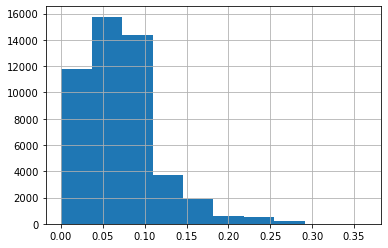

In [220]:
df['distance'].hist()

In [221]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [222]:
scaler_list = ['neighbourhood_freq', 'distance', 'minimum_nights', 
               'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']   

In [223]:
df_metrics = regressions_with_scaler(df, StandardScaler(), scaler_list)
df_metrics

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LinearRegression
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: RidgeCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 10.00000
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LassoCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.04199
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: ElasticNetCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.08397


error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         72.815819   72.839607   72.790679     72.326167
1       RMSE        227.856946  227.860249  227.854288    227.909877
2         R2          0.091503    0.091476    0.091524      0.091081

In [224]:
df_metrics_base

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.159855   73.064345     86.089001
1       RMSE        227.860225  227.864648  228.711975    235.576292
2         R2          0.091477    0.091441    0.084672      0.028904

In [225]:
df_metrics_StandardScaler

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.236457   73.164194   73.142410     72.810911
1       RMSE        227.865581  227.862977  227.863207    228.170576
2         R2          0.091434    0.091455    0.091453      0.089000

##### –∫–∞—á–µ—Å—Ç–≤–æ —É–ª—É—á—à–∏–ª–æ—Å—å

In [226]:
# –Ω–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ. districts = neighbourhood_group + neighbourhood -> pd.get_dummies
df['districts'] = data['neighbourhood_group'] + '.' + data['neighbourhood']

In [227]:
df.drop(columns=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], inplace=True)

In [228]:
df.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  Entire home/apt  \
0                               6               365                0   
1                               2               355                1   
2                               1               365                0   
3                               1               194                1   
4                               1                 0                1   

   Private room  Shared room  neighbourhood_freq  distance  \
0             1            0            0.003579  0.112134   
1             0            0            0.031598  0.005448   
2             1            0            0.054361  0.066191   
3             0            0            0.011699  0.077997   
4             0            0            0.022845  0.057112   

               districts  
0    Brooklyn.Kensington  
1      Manhattan.Midtown  
2       Manhattan.Harlem  
3  Brooklyn.Clinton Hill  
4  Manhattan.East Harlem

In [229]:
df = pd.concat([df, pd.get_dummies(df['districts'])], axis=1)

In [230]:
df.drop(columns=['districts'], inplace=True)

In [231]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [232]:
scaler_list = list(X.columns)

In [233]:
df_metrics = regressions_with_scaler(df, StandardScaler(), scaler_list)
df_metrics_best = df_metrics.copy()
df_metrics_best

–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LinearRegression
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: RidgeCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 10.00000
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: LassoCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.28791
–†–µ–≥—Ä–µ—Å—Å–æ—Ä: ElasticNetCV
–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏: 0.18856


error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE      3.473094e+11   71.226183   70.660647     69.889609
1       RMSE      2.428616e+13  226.862938  226.767785    226.637858
2         R2     -1.032088e+22    0.099412    0.100167      0.101198

In [234]:
df_metrics_base

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.186321   73.159855   73.064345     86.089001
1       RMSE        227.860225  227.864648  228.711975    235.576292
2         R2          0.091477    0.091441    0.084672      0.028904

In [235]:
df_metrics_StandardScaler

error_name  LinearRegression     RidgeCV     LassoCV  ElasticNetCV
0        MAE         73.236457   73.164194   73.142410     72.810911
1       RMSE        227.865581  227.862977  227.863207    228.170576
2         R2          0.091434    0.091455    0.091453      0.089000

# –í—ã–≤–æ–¥: –ª—É—á—à–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ–ª—É—á–∏–ª–∏—Å—å –¥–ª—è –º–æ–¥–µ–ª–∏ df_metrics_best : ElasticNetCV